# Position of the minimum value of Ksat

According to the Soil Survey Manual contained in the USDA Handbook the hydrological soil group is increased by one class if the minimum value of Ksat occurs between 0.5 and 1 m. 
The following code estimate Ksat in three different terrain layers. The value of Ksat is evaluated in two ways: using the method of Rawls and Brakensiek, 1983 and using Rosetta-3a. The first method takes a few minutes to perform the calculations. on the other hand Rosetta require a considerably longer computational time (<10 times). The used methods and code are well described in the file Ksat_Brakeinsiel_Rosetta.ipynb

To use the code section for the calculation from Ksat with the Rosetta program, it is necessary to first run the code section using Rawls and Brakensiek, 1983 for the same layer. 

The layers' inputs used are taken from [soilgrids](https://www.isric.org/explore/soilgrids).

The programme output is a required input for the code hydrologic_group.ipynb.

# 0-60 cm Ksat group estimation (Rawls and Brakensiek, 1983)

In [ ]:
pip install owslib

In [ ]:
pip install rasterio

In [ ]:
# area selection (coords box) it must be provided the bottom lef corner coordinates followed by the top right corner cordinates
bbox = (540000, 5400000, 1100000, 5740000)

In [ ]:
# importing the WCS data loading function istalled in the previous section of the code.
from owslib.wcs import WebCoverageService
# importing the WCS data loading function istalled in the previous section of the code.
clay_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/clay.map', version='1.0.0', timeout=120)
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
clay0_5 = rasterio.open(".northIT_clay_0-5_mean.tif", driver="GTiff")

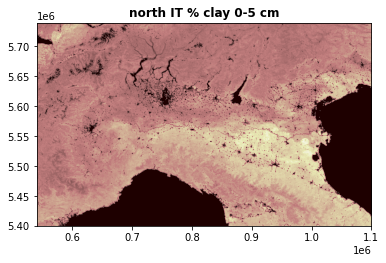

In [ ]:
# load the plot function od rasterio
from rasterio import plot as rplt
%matplotlib inline
# plot the georeferenced data
rplt.show(clay0_5, title='north IT % clay 0-5 cm', cmap='pink')

In [ ]:
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
# open the saved file as a raster
clay5_15 = rasterio.open(".northIT_clay_5-15_mean.tif", driver="GTiff")

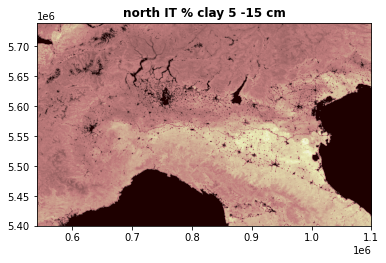

In [ ]:
# plot the georeferenced data
rplt.show(clay5_15, title='north IT % clay 5 -15 cm', cmap='pink')

In [ ]:
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
clay15_30 = rasterio.open(".northIT_clay_15-30_mean.tif", driver="GTiff")

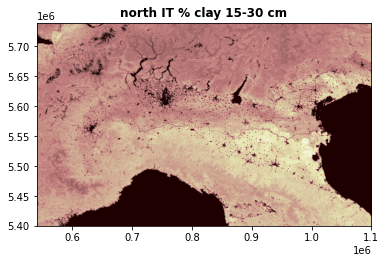

In [ ]:
# plot the georeferenced data
rplt.show(clay15_30, title='north IT % clay 15-30 cm', cmap='pink')

In [ ]:
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
clay30_60 = rasterio.open(".northIT_clay_30-60_mean.tif", driver="GTiff")

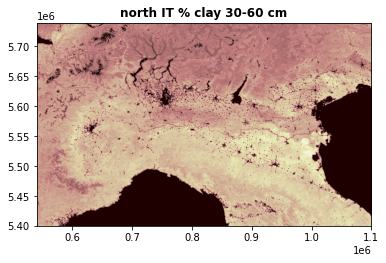

In [ ]:
# plot the georeferenced data
rplt.show(clay30_60, title='north IT % clay 30-60 cm', cmap='pink')

In [ ]:
clay0_60 = clay0_5.read(1)*(5/60) + clay5_15.read(1)*(10/60) + clay15_30.read(1)*(15/60) + clay30_60.read(1)*(30/60)
clay060 = clay0_5.meta
clay060.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_clay_0-60_mean.tif', 'w', **clay060) as dst:
        dst.write_band(1, clay0_60.astype(rasterio.float32))
#open the saved file
clay060 = rasterio.open("northIT_clay_0-60_mean.tif", driver="GTiff")

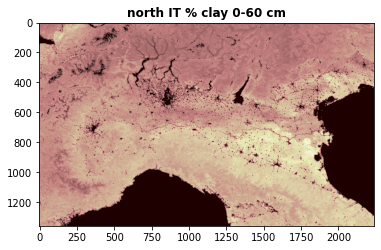

In [ ]:
# plot the georeferenced data
rplt.show(clay0_60, title='north IT % clay 0-60 cm', cmap='pink')

In [ ]:
# importing the WCS data loading function istalled in the previous section of the code.
sand_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/sand.map', version='1.0.0')
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand0_5 = rasterio.open(".northIT_sand_0-5_mean.tif", driver="GTiff")

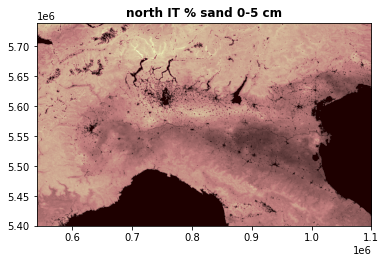

In [ ]:
# plot the georeferenced data
rplt.show(sand0_5, title='north IT % sand 0-5 cm', cmap='pink')

In [ ]:
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand5_15 = rasterio.open(".northIT_sand_5-15_mean.tif", driver="GTiff")

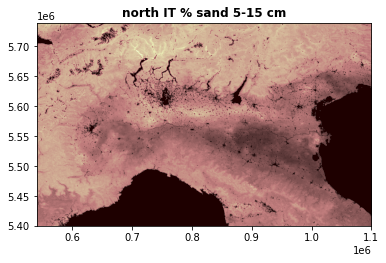

In [ ]:
# plot the georeferenced data
rplt.show(sand5_15, title='north IT % sand 5-15 cm', cmap='pink')

In [ ]:
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand15_30 = rasterio.open(".northIT_sand_15-30_mean.tif", driver="GTiff")

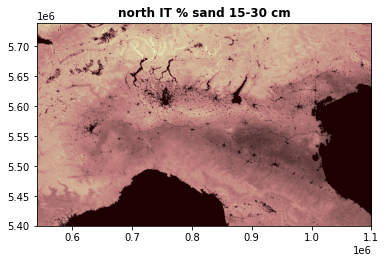

In [ ]:
# plot the georeferenced data
rplt.show(sand15_30, title='north IT % sand 15-30 cm', cmap='pink')

In [ ]:
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand30_60 = rasterio.open(".northIT_sand_30-60_mean.tif", driver="GTiff")

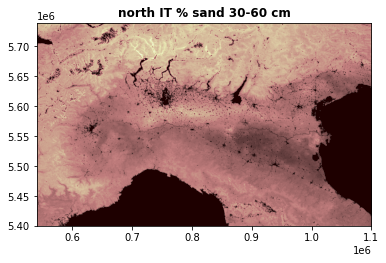

In [ ]:
# plot the georeferenced data
rplt.show(sand30_60, title='north IT % sand 30-60 cm', cmap='pink')

In [ ]:
sand0_60 = sand0_5.read(1)*(5/60) + sand5_15.read(1)*(10/60) + sand15_30.read(1)*(15/60) + sand30_60.read(1)*(30/60)
sand060 = sand0_5.meta
sand060.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_sand_0-60_mean.tif', 'w', **sand060) as dst:
        dst.write_band(1, sand0_60.astype(rasterio.float32))
#open the saved file
sand060 = rasterio.open("northIT_sand_0-60_mean.tif", driver="GTiff")

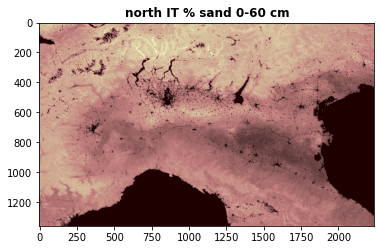

In [ ]:
# plot the georeferenced data
rplt.show(sand0_60, title='north IT % sand 0-60 cm', cmap='pink')

In [ ]:
# importing the WCS data loading function istalled in the previous section of the code.
bdod_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/bdod.map', version='1.0.0')
# load the bulck density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
bdod0_5 = rasterio.open(".northIT_bdod_0-5_mean.tif", driver="GTiff")

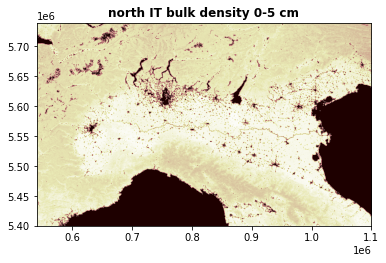

In [ ]:
# plot the georeferenced data
rplt.show(bdod0_5, title='north IT bulk density 0-5 cm', cmap='pink')

In [ ]:
# load the bulk density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
bdod5_15 = rasterio.open(".northIT_bdod_5-15_mean.tif", driver="GTiff")

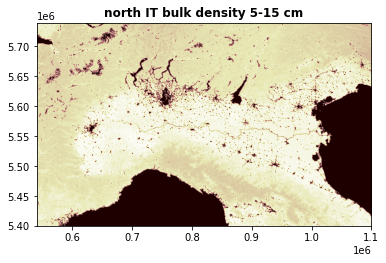

In [ ]:
# plot the georeferenced data
rplt.show(bdod5_15, title='north IT bulk density 5-15 cm', cmap='pink')

In [ ]:
# load the bulk density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
bdod15_30 = rasterio.open(".northIT_bdod_15-30_mean.tif", driver="GTiff")

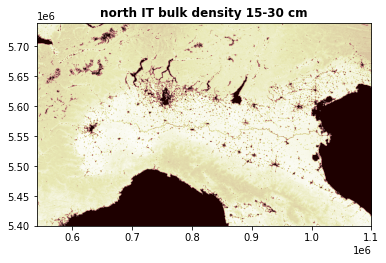

In [ ]:
# plot the georeferenced data
rplt.show(bdod15_30, title='north IT bulk density 15-30 cm', cmap='pink')

In [ ]:
# load the bulk density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
bdod30_60 = rasterio.open(".northIT_bdod_30-60_mean.tif", driver="GTiff")

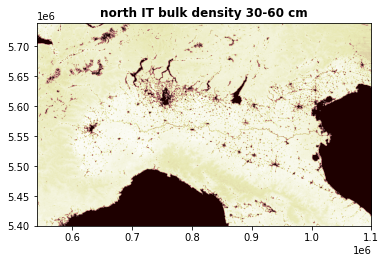

In [ ]:
# plot the georeferenced data
rplt.show(bdod30_60, title='north IT bulk density 30-60 cm', cmap='pink')

In [ ]:
bdod0_60 = bdod0_5.read(1)*(5/60) + bdod5_15.read(1)*(10/60) + bdod15_30.read(1)*(15/60) + bdod30_60.read(1)*(30/60)
bdod060 = bdod0_5.meta
bdod060.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_bdod_0-60_mean.tif', 'w', **bdod060) as dst:
        dst.write_band(1, bdod0_60.astype(rasterio.float32))
#open the saved file
bdod060 = rasterio.open("northIT_bdod_0-60_mean.tif", driver="GTiff")

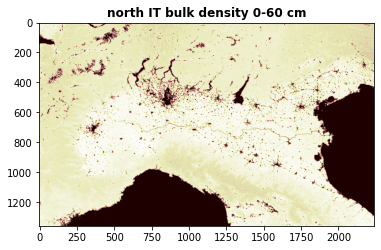

In [ ]:
# plot the georeferenced data
rplt.show(bdod0_60, title='north IT bulk density 0-60 cm', cmap='pink')

In the next section is also loaded the silt content. It is done to check the data of clay and sand. The sum of the three concentrations must be one. the silt content will be used for the evalutation with Rosetta.

In [ ]:
silt_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/silt.map', version='1.0.0')
response = silt_wcs.getCoverage(
    identifier='silt_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
import rasterio
silt0_5 = rasterio.open(".northIT_silt_0-5_mean.tif", driver="GTiff")

In [ ]:
response = silt_wcs.getCoverage(
    identifier='silt_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
import rasterio
silt5_15 = rasterio.open(".northIT_silt_5-15_mean.tif", driver="GTiff")

In [ ]:
response = silt_wcs.getCoverage(
    identifier='silt_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
import rasterio
silt15_30 = rasterio.open(".northIT_silt_15-30_mean.tif", driver="GTiff")

In [ ]:
response = silt_wcs.getCoverage(
    identifier='silt_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
import rasterio
silt30_60 = rasterio.open(".northIT_silt_30-60_mean.tif", driver="GTiff")

In [ ]:
silt0_60 = silt0_5.read(1)*(5/60) + silt5_15.read(1)*(10/60) + silt15_30.read(1)*(15/60) + silt30_60.read(1)*(30/60)
silt060 = silt0_5.meta
silt060.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_silt_0-60_mean.tif', 'w', **silt060) as dst:
        dst.write_band(1, silt0_60.astype(rasterio.float32))
#open the saved file
silt060 = rasterio.open("northIT_silt_0-60_mean.tif", driver="GTiff")

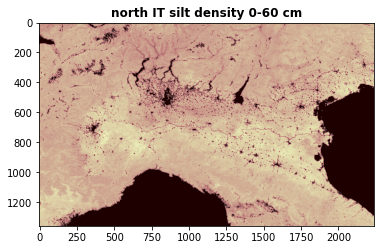

In [ ]:
# plot the georeferenced data
rplt.show(silt0_60, title='north IT silt density 0-60 cm', cmap='pink')

Text(0.5, 1.0, 'verification graph')

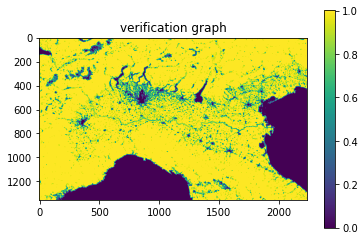

In [ ]:
#import mat plot lib in order to plot the color bar
import matplotlib.pyplot as plt
#sum Clay Sand and Silt content (in g/kg) and divide it by 1000 to obtain a fraction
verifica = (sand060.read(1)+silt060.read(1)+clay060.read(1))/1000
#plot the immage and the color bar.
plt.imshow(verifica)
plt.colorbar()
plt.title('verification graph')


In [ ]:
# import the pandas library for the dataframe managing
import pandas as pd
# import form the shaply library the fuction point and Polygon to trasform the 
# input raster gfeoreferenced data into a table point object and to transform 
# the loaded Table's polygon point in to a Polygon object
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

#first chek of input data, if the poin are out of the polygon data raise an error
if ((sand060.read(1)+silt060.read(1))> 1000).any():
    raise Exception ('sand and clay % excede the 100%. check the input data!')

# load data from the .xlsx file and transform them in Polygons 
hbd=pd.read_excel('Ksat.xlsx',sheet_name='high bulk density poli') #high bulk density
hbd_1 = pd.DataFrame(hbd, columns= ['poligono 1 x','poligono 1 y'])
hbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
hbd_1p=Polygon(hbd_1.values.tolist())
hbd_2 = pd.DataFrame(hbd, columns= ['poligono 2 x','poligono 2 y'])
hbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
hbd_2p=Polygon(hbd_2.values.tolist())
hbd_3 = pd.DataFrame(hbd, columns= ['poligono 3 x','poligono 3 y'])
hbd_3p=Polygon(hbd_3.values.tolist())
hbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
hbd_4 = pd.DataFrame(hbd, columns= ['poligono 4 x','poligono 4 y'])
hbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
hbd_4p=Polygon(hbd_4.values.tolist())
hbd_5 = pd.DataFrame(hbd, columns= ['poligono 5 x','poligono 5 y'])
hbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
hbd_5p=Polygon(hbd_5.values.tolist())

In [ ]:
mbd=pd.read_excel('Ksat.xlsx',sheet_name='med bulk density poli') #med bulk density
mbd_1 = pd.DataFrame(mbd, columns= ['poligono 1 x','poligono 1 y'])
mbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
mbd_1p=Polygon(mbd_1.values.tolist())
mbd_2 = pd.DataFrame(mbd, columns= ['poligono 2 x','poligono 2 y'])
mbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
mbd_2p=Polygon(mbd_2.values.tolist())
mbd_3 = pd.DataFrame(mbd, columns= ['poligono 3 x','poligono 3 y'])
mbd_3p=Polygon(mbd_3.values.tolist())
mbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
mbd_4 = pd.DataFrame(mbd, columns= ['poligono 4 x','poligono 4 y'])
mbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
mbd_4p=Polygon(mbd_4.values.tolist())
mbd_5 = pd.DataFrame(mbd, columns= ['poligono 5 x','poligono 5 y'])
mbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
mbd_5p=Polygon(mbd_5.values.tolist())
mbd_6 = pd.DataFrame(mbd, columns= ['poligono 6 x','poligono 6 y'])
mbd_6.dropna(subset = ["poligono 6 x"], inplace=True)
mbd_6p=Polygon(mbd_6.values.tolist())

In [ ]:
lbd=pd.read_excel('Ksat.xlsx',sheet_name='low bulk density poli') #led bulk density
lbd_1 = pd.DataFrame(lbd, columns= ['poligono 1 x','poligono 1 y'])
lbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
lbd_1p=Polygon(lbd_1.values.tolist())
lbd_2 = pd.DataFrame(lbd, columns= ['poligono 2 x','poligono 2 y'])
lbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
lbd_2p=Polygon(lbd_2.values.tolist())
lbd_3 = pd.DataFrame(lbd, columns= ['poligono 3 x','poligono 3 y'])
lbd_3p=Polygon(lbd_3.values.tolist())
lbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
lbd_4 = pd.DataFrame(lbd, columns= ['poligono 4 x','poligono 4 y'])
lbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
lbd_4p=Polygon(lbd_4.values.tolist())
lbd_5 = pd.DataFrame(lbd, columns= ['poligono 5 x','poligono 5 y'])
lbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
lbd_5p=Polygon(lbd_5.values.tolist())
lbd_6 = pd.DataFrame(lbd, columns= ['poligono 6 x','poligono 6 y'])
lbd_6.dropna(subset = ["poligono 6 x"], inplace=True)
lbd_6p=Polygon(lbd_6.values.tolist())
lbd_7 = pd.DataFrame(lbd, columns= ['poligono 7 x','poligono 7 y'])
lbd_7.dropna(subset = ["poligono 7 x"], inplace=True)
lbd_7p=Polygon(lbd_7.values.tolist())

In [ ]:
#transform the input data ind datagrame and det them in the tables unit of measure
x = sand060.read(1)/1000
y = clay060.read(1)/1000
z = bdod060.read(1)/100

In [ ]:
# import numpy because it will be needed in the definde fucntion
import numpy as np
# define a function for the bulk density class selection
def bd_group_selector(x,y,z,lbd_6p,lbd_5p,lbd_4p,lbd_3p,lbd_2p,lbd_1p,lbd_7p,mbd_6p,mbd_5p,mbd_4p,mbd_3p,mbd_2p,mbd_1p,hbd_5p,hbd_4p,hbd_3p,hbd_2p,hbd_1p):
  bd_group = np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
     point = Point(x[i,j],y[i,j])
     if x[i,j] == 0 and y[i,j] == 0: #mare o  no data
       bd_group[i,j] = -1
     elif lbd_7p.contains(point) and z[i,j]<1.19:
       bd_group[i,j] = 1
     elif lbd_6p.contains(point) and z[i,j]<0.93:
       bd_group[i,j] = 1
     elif lbd_5p.contains(point) and z[i,j]<1.32:
       bd_group[i,j] = 1
     elif lbd_4p.contains(point) and z[i,j]<1.06:
       bd_group[i,j] = 1
     elif lbd_3p.contains(point) and z[i,j]<1.32:
       bd_group[i,j] = 1
     elif lbd_2p.contains(point) and z[i,j]<1.06:
       bd_group[i,j] = 1
     elif lbd_1p.contains(point) and z[i,j]<0.93:  
       bd_group[i,j] = 1 
     elif hbd_5p.contains(point) and 1.72<z[i,j]:
       bd_group[i,j] = 3      
     elif hbd_4p.contains(point) and 1.19<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_3p.contains(point) and 1.46<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_2p.contains(point) and 1.59<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_1p.contains(point) and 1.32<z[i,j]:
       bd_group[i,j] = 3
     elif mbd_6p.contains(point) and 1.59<=z[i,j]<=1.72:
       bd_group[i,j] = 2
     elif mbd_5p.contains(point) and 1.48<=z[i,j]<=1.72:
       bd_group[i,j] = 2
     elif mbd_4p.contains(point) and 0.93<=z[i,j]<=1.19:
       bd_group[i,j] = 2
     elif mbd_3p.contains(point) and 1.19<=z[i,j]<=1.46:
       bd_group[i,j] = 2
     elif mbd_2p.contains(point) and 1.30<=z[i,j]<=1.48:
       bd_group[i,j] = 2
     else:
       bd_group[i,j] = 0
  return bd_group


Text(0, 0.5, 'Row #')

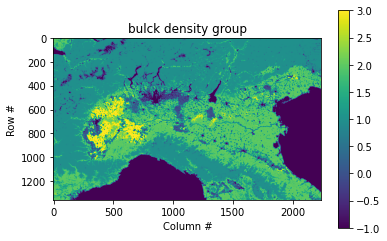

In [ ]:
bd_group = bd_group_selector(x,y,z,lbd_6p,lbd_5p,lbd_4p,lbd_3p,lbd_2p,lbd_1p,lbd_7p,mbd_6p,mbd_5p,mbd_4p,mbd_3p,mbd_2p,mbd_1p,hbd_5p,hbd_4p,hbd_3p,hbd_2p,hbd_1p)

plt.imshow(bd_group)
plt.colorbar()
plt.title('bulck density group')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
# Ksat Goup table loading 
Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI High bulk') #med bulk density
hb_l_ksat= pd.DataFrame(Ksat, columns= ['low x','low y'])
hb_l_ksat.dropna(subset = ["low x"], inplace=True)
hb_l_ksatp=Polygon(hb_l_ksat.values.tolist())
hb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
hb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
hb_ml_ksatp = Polygon(hb_ml_ksat.values.tolist())
hb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
hb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
hb_mh_ksatp=Polygon(hb_mh_ksat.values.tolist())

Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI Med bulk') #med bulk density
mb_l_ksat= pd.DataFrame(Ksat, columns= ['low x','low y'])
mb_l_ksat.dropna(subset = ["low x"], inplace=True)
mb_l_ksatp=Polygon(mb_l_ksat.values.tolist())
mb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
mb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
mb_ml_ksatp = Polygon(mb_ml_ksat.values.tolist())
mb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
mb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
mb_mh_ksatp=Polygon(mb_mh_ksat.values.tolist())
mb_h_ksat = pd.DataFrame(Ksat, columns= ['high x','high y'])
mb_h_ksat.dropna(subset = ['high x'], inplace=True)
mb_h_ksatp=Polygon(mb_h_ksat.values.tolist())


Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI Low bulk') #med bulk density
lb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
lb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
lb_ml_ksatp = Polygon(lb_ml_ksat.values.tolist())
lb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
lb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
lb_mh_ksatp=Polygon(lb_mh_ksat.values.tolist())
lb_h_ksat = pd.DataFrame(Ksat, columns= ['high x','high y'])
lb_h_ksat.dropna(subset = ['high x'], inplace=True)
lb_h_ksatp=Polygon(lb_h_ksat.values.tolist())


#Ksat Group assignement

GKsat = np.zeros(np.shape(x))
GKsatm = (1)
for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
        point = Point(x[i,j],y[i,j])
        if bd_group[i,j] == -1: #mare lago o no data
            GKsat[i,j] = -1
        elif bd_group [i,j] == 1:
            if lb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif lb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
            elif lb_h_ksatp.contains(point):
                GKsat[i,j] = 4
        elif bd_group [i,j] == 2:
            if mb_l_ksatp.contains(point):
                GKsat[i,j] = 1
            elif mb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif mb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
            elif mb_h_ksatp.contains(point):
                GKsat[i,j] = 4
        elif bd_group [i,j] == 3:
            if hb_l_ksatp.contains(point):
                GKsat[i,j] = 1
            elif hb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif hb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
        elif bd_group [i,j] == 0:
            GKsat[i,j] = GKsatm
        Gksatm = GKsat[i,j] # dato precedente: se il dato non è presente viene assegnato il gruppo della cella accanto



In [ ]:
# numer of cells with not enough data
print(sum(sum(bd_group==0))/(np.shape(bd_group)[0]*np.shape(bd_group)[1]))

0.03813550420168067


Text(0.5, 1.0, 'Ksat group')

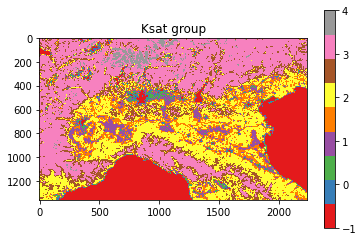

In [ ]:
# result plotting 
plt.imshow(GKsat, cmap='Set1',)
plt.colorbar()
plt.title('Ksat group')

In [ ]:
# save Ksat group
Group_ksat = silt060.meta
Group_ksat.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('Group_ksat0-60.tif', 'w', **Group_ksat) as dst:
        dst.write_band(1, GKsat.astype(rasterio.float32))

#0-60 cm Ksat group estimation (Rosetta)

In [ ]:
sand_c060 = sand060.read(1).flatten()/1000
silt_c060 = silt060.read(1).flatten()/1000
clay_c060 = clay060.read(1).flatten()/1000
bd_c060 = bdod060.read(1).flatten()/100
split_sand_c060 = np.split(sand_c060,100)
split_silt_c060 = np.split(silt_c060,100)
split_clay_c060 = np.split(clay_c060,100)
split_bd_c060 = np.split(bd_c060,100)

dim=(np.shape(sand_c060)[0])
Ksat = np.zeros(dim)
start = 0
for i in range(100):
  input_data = np.column_stack((split_sand_c060[i],split_silt_c060[i],split_clay_c060[i],split_bd_c060[i]))
  np.savetxt('input_data.txt', input_data)
  #create an empity output file
  output_data  = np.array([0,0])
  np.savetxt('output_data.txt', output_data)
  %run /content/drive/MyDrive/Rosetta_3/Rpredict.py   -i   input_data.txt  -o  output_data.txt --predict  --sqlite=/content/drive/MyDrive/Rosetta_3/sqlite/Rosetta.sqlite
  output = np.loadtxt('output_data.txt', delimiter=',')
  finish = start+int(dim/100) 
  Ksat [start:finish] = output[:,4]
  start = finish
  print(i)

input_data.txt
[[0.46066666 0.47999999 0.50408334 ... 0.43558335 0.43116665 0.45291665]
 [0.29883334 0.30575001 0.29633334 ... 0.35091665 0.35416666 0.35466665]
 [0.23983333 0.21483333 0.19883333 ... 0.21349999 0.21508333 0.192     ]
 [1.42416668 1.41583323 1.41666675 ... 1.2166667  1.23000002 1.23416662]]
Getting models from database
Getting models from database, done (0.8715245723724365 s)
[[0.46066666 0.47999999 0.50408334 ... 0.43558335 0.43116665 0.45291665]
 [0.29883334 0.30575001 0.29633334 ... 0.35091665 0.35416666 0.35466665]
 [0.23983333 0.21483333 0.19883333 ... 0.21349999 0.21508333 0.192     ]
 [1.42416668 1.41583323 1.41666675 ... 1.2166667  1.23000002 1.23416662]]
Processing
Processing done (178.34702944755554 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70943744e-01 4.76685713e-01 1.21848328e-02 2.38530370e+00
  1.35724177e+02]
 [1.71035874e-01 4.77674895e-01 1.21719293e-02 2.38661243e+00
  1.37478803e+02]
 [1.71006787e-01 4.77562201e-01 1.21771589e-02 2.38

<Figure size 432x288 with 0 Axes>

In [ ]:
np.savetxt('Ksat.txt', Ksat)

In [ ]:
Ksat_Rosetta = np.loadtxt('Ksat.txt', dtype= float)
Ksat_R_img = np.reshape(Ksat_Rosetta,[1360,2240])
Ksat_R_img = Ksat_R_img*(GKsat>0)+(GKsat<=0)*-75

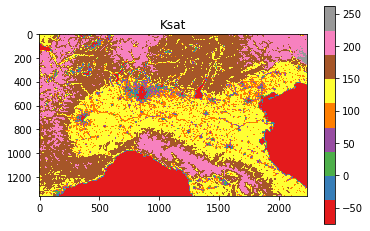

In [ ]:
plt.imshow(Ksat_R_img, cmap='Set1',)
plt.colorbar()
plt.title('Ksat')
plt.show()

In [ ]:
# save Ksat group
ksat_Rosetta = silt060.meta
ksat_Rosetta.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('ksat_Rosetta_0_60.tif', 'w', **ksat_Rosetta) as dst:
        dst.write_band(1, Ksat_R_img.astype(rasterio.float32))

# 60-100 cm Ksat group estimation  (Rawls and Brakensiek, 1983)

In [ ]:
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
clay60100 = rasterio.open(".northIT_clay_60-100_mean.tif", driver="GTiff")


In [ ]:
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand60100 = rasterio.open(".northIT_sand_60-100_mean.tif", driver="GTiff")

In [ ]:
# load the bulck density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
bdod60100 = rasterio.open(".northIT_bdod_60-100_mean.tif", driver="GTiff")

In [ ]:
response = silt_wcs.getCoverage(
    identifier='silt_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
import rasterio
silt60100 = rasterio.open(".northIT_silt_60-100_mean.tif", driver="GTiff")

In [ ]:
#transform the input data ind datagrame and det them in the tables unit of measure
x = sand60100.read(1)/1000
y = clay60100.read(1)/1000
z = bdod60100.read(1)/100

In [ ]:
# import the pandas library for the dataframe managing
import pandas as pd
# import form the shaply library the fuction point and Polygon to trasform the 
# input raster gfeoreferenced data into a table point object and to transform 
# the loaded Table's polygon point in to a Polygon object
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

#first chek of input data, if the poin are out of the polygon data raise an error
if ((sand60100.read(1)+silt60100.read(1))> 1000).any():
    raise Exception ('sand and clay % excede the 100%. check the input data!')

# load data from the .xlsx file and transform them in Polygons 
hbd=pd.read_excel('Ksat.xlsx',sheet_name='high bulk density poli') #high bulk density
hbd_1 = pd.DataFrame(hbd, columns= ['poligono 1 x','poligono 1 y'])
hbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
hbd_1p=Polygon(hbd_1.values.tolist())
hbd_2 = pd.DataFrame(hbd, columns= ['poligono 2 x','poligono 2 y'])
hbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
hbd_2p=Polygon(hbd_2.values.tolist())
hbd_3 = pd.DataFrame(hbd, columns= ['poligono 3 x','poligono 3 y'])
hbd_3p=Polygon(hbd_3.values.tolist())
hbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
hbd_4 = pd.DataFrame(hbd, columns= ['poligono 4 x','poligono 4 y'])
hbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
hbd_4p=Polygon(hbd_4.values.tolist())
hbd_5 = pd.DataFrame(hbd, columns= ['poligono 5 x','poligono 5 y'])
hbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
hbd_5p=Polygon(hbd_5.values.tolist())

In [ ]:
mbd=pd.read_excel('Ksat.xlsx',sheet_name='med bulk density poli') #med bulk density
mbd_1 = pd.DataFrame(mbd, columns= ['poligono 1 x','poligono 1 y'])
mbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
mbd_1p=Polygon(mbd_1.values.tolist())
mbd_2 = pd.DataFrame(mbd, columns= ['poligono 2 x','poligono 2 y'])
mbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
mbd_2p=Polygon(mbd_2.values.tolist())
mbd_3 = pd.DataFrame(mbd, columns= ['poligono 3 x','poligono 3 y'])
mbd_3p=Polygon(mbd_3.values.tolist())
mbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
mbd_4 = pd.DataFrame(mbd, columns= ['poligono 4 x','poligono 4 y'])
mbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
mbd_4p=Polygon(mbd_4.values.tolist())
mbd_5 = pd.DataFrame(mbd, columns= ['poligono 5 x','poligono 5 y'])
mbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
mbd_5p=Polygon(mbd_5.values.tolist())
mbd_6 = pd.DataFrame(mbd, columns= ['poligono 6 x','poligono 6 y'])
mbd_6.dropna(subset = ["poligono 6 x"], inplace=True)
mbd_6p=Polygon(mbd_6.values.tolist())

In [ ]:
lbd=pd.read_excel('Ksat.xlsx',sheet_name='low bulk density poli') #led bulk density
lbd_1 = pd.DataFrame(lbd, columns= ['poligono 1 x','poligono 1 y'])
lbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
lbd_1p=Polygon(lbd_1.values.tolist())
lbd_2 = pd.DataFrame(lbd, columns= ['poligono 2 x','poligono 2 y'])
lbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
lbd_2p=Polygon(lbd_2.values.tolist())
lbd_3 = pd.DataFrame(lbd, columns= ['poligono 3 x','poligono 3 y'])
lbd_3p=Polygon(lbd_3.values.tolist())
lbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
lbd_4 = pd.DataFrame(lbd, columns= ['poligono 4 x','poligono 4 y'])
lbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
lbd_4p=Polygon(lbd_4.values.tolist())
lbd_5 = pd.DataFrame(lbd, columns= ['poligono 5 x','poligono 5 y'])
lbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
lbd_5p=Polygon(lbd_5.values.tolist())
lbd_6 = pd.DataFrame(lbd, columns= ['poligono 6 x','poligono 6 y'])
lbd_6.dropna(subset = ["poligono 6 x"], inplace=True)
lbd_6p=Polygon(lbd_6.values.tolist())
lbd_7 = pd.DataFrame(lbd, columns= ['poligono 7 x','poligono 7 y'])
lbd_7.dropna(subset = ["poligono 7 x"], inplace=True)
lbd_7p=Polygon(lbd_7.values.tolist())

In [ ]:
# import numpy because it will be needed in the definde fucntion
import numpy as np
# define a function for the bulk density class selection
def bd_group_selector(x,y,z,lbd_6p,lbd_5p,lbd_4p,lbd_3p,lbd_2p,lbd_1p,lbd_7p,mbd_6p,mbd_5p,mbd_4p,mbd_3p,mbd_2p,mbd_1p,hbd_5p,hbd_4p,hbd_3p,hbd_2p,hbd_1p):
  bd_group = np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
     point = Point(x[i,j],y[i,j])
     if x[i,j] == 0 and y[i,j] == 0: #mare o  no data
       bd_group[i,j] = -1
     elif lbd_7p.contains(point) and z[i,j]<1.19:
       bd_group[i,j] = 1
     elif lbd_6p.contains(point) and z[i,j]<0.93:
       bd_group[i,j] = 1
     elif lbd_5p.contains(point) and z[i,j]<1.32:
       bd_group[i,j] = 1
     elif lbd_4p.contains(point) and z[i,j]<1.06:
       bd_group[i,j] = 1
     elif lbd_3p.contains(point) and z[i,j]<1.32:
       bd_group[i,j] = 1
     elif lbd_2p.contains(point) and z[i,j]<1.06:
       bd_group[i,j] = 1
     elif lbd_1p.contains(point) and z[i,j]<0.93:  
       bd_group[i,j] = 1 
     elif hbd_5p.contains(point) and 1.72<z[i,j]:
       bd_group[i,j] = 3      
     elif hbd_4p.contains(point) and 1.19<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_3p.contains(point) and 1.46<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_2p.contains(point) and 1.59<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_1p.contains(point) and 1.32<z[i,j]:
       bd_group[i,j] = 3
     elif mbd_6p.contains(point) and 1.59<=z[i,j]<=1.72:
       bd_group[i,j] = 2
     elif mbd_5p.contains(point) and 1.48<=z[i,j]<=1.72:
       bd_group[i,j] = 2
     elif mbd_4p.contains(point) and 0.93<=z[i,j]<=1.19:
       bd_group[i,j] = 2
     elif mbd_3p.contains(point) and 1.19<=z[i,j]<=1.46:
       bd_group[i,j] = 2
     elif mbd_2p.contains(point) and 1.30<=z[i,j]<=1.48:
       bd_group[i,j] = 2
     else:
       bd_group[i,j] = 0
  return bd_group


Text(0, 0.5, 'Row #')

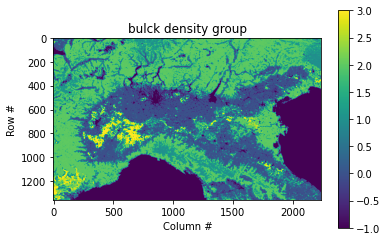

In [ ]:
bd_group = bd_group_selector(x,y,z,lbd_6p,lbd_5p,lbd_4p,lbd_3p,lbd_2p,lbd_1p,lbd_7p,mbd_6p,mbd_5p,mbd_4p,mbd_3p,mbd_2p,mbd_1p,hbd_5p,hbd_4p,hbd_3p,hbd_2p,hbd_1p)

import matplotlib.pyplot as plt

plt.imshow(bd_group)
plt.colorbar()
plt.title('bulck density group')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
# Ksat Goup table loading 
Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI High bulk') #med bulk density
hb_l_ksat= pd.DataFrame(Ksat, columns= ['low x','low y'])
hb_l_ksat.dropna(subset = ["low x"], inplace=True)
hb_l_ksatp=Polygon(hb_l_ksat.values.tolist())
hb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
hb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
hb_ml_ksatp = Polygon(hb_ml_ksat.values.tolist())
hb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
hb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
hb_mh_ksatp=Polygon(hb_mh_ksat.values.tolist())

Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI Med bulk') #med bulk density
mb_l_ksat= pd.DataFrame(Ksat, columns= ['low x','low y'])
mb_l_ksat.dropna(subset = ["low x"], inplace=True)
mb_l_ksatp=Polygon(mb_l_ksat.values.tolist())
mb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
mb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
mb_ml_ksatp = Polygon(mb_ml_ksat.values.tolist())
mb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
mb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
mb_mh_ksatp=Polygon(mb_mh_ksat.values.tolist())
mb_h_ksat = pd.DataFrame(Ksat, columns= ['high x','high y'])
mb_h_ksat.dropna(subset = ['high x'], inplace=True)
mb_h_ksatp=Polygon(mb_h_ksat.values.tolist())


Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI Low bulk') #med bulk density
lb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
lb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
lb_ml_ksatp = Polygon(lb_ml_ksat.values.tolist())
lb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
lb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
lb_mh_ksatp=Polygon(lb_mh_ksat.values.tolist())
lb_h_ksat = pd.DataFrame(Ksat, columns= ['high x','high y'])
lb_h_ksat.dropna(subset = ['high x'], inplace=True)
lb_h_ksatp=Polygon(lb_h_ksat.values.tolist())


#Ksat Group assignement

GKsat = np.zeros(np.shape(x))
GKsatm = (1)
for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
        point = Point(x[i,j],y[i,j])
        if bd_group[i,j] == -1: #mare lago o no data
            GKsat[i,j] = -1
        elif bd_group [i,j] == 1:
            if lb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif lb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
            elif lb_h_ksatp.contains(point):
                GKsat[i,j] = 4
        elif bd_group [i,j] == 2:
            if mb_l_ksatp.contains(point):
                GKsat[i,j] = 1
            elif mb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif mb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
            elif mb_h_ksatp.contains(point):
                GKsat[i,j] = 4
        elif bd_group [i,j] == 3:
            if hb_l_ksatp.contains(point):
                GKsat[i,j] = 1
            elif hb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif hb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
        elif bd_group [i,j] == 0:
            GKsat[i,j] = GKsatm
        Gksatm = GKsat[i,j] # dato precedente: se il dato non è presente viene assegnato il gruppo della cella accanto



In [ ]:
# numer of cells with not enough data
print(sum(sum(bd_group==0))/(np.shape(bd_group)[0]*np.shape(bd_group)[1]))

0.2844271927521008


Text(0.5, 1.0, 'Ksat group')

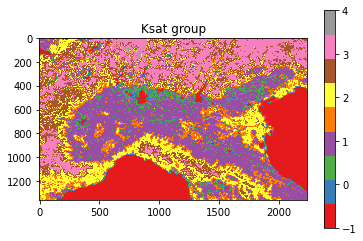

In [ ]:
# result plotting 
plt.imshow(GKsat, cmap='Set1',)
plt.colorbar()
plt.title('Ksat group')

In [ ]:
# save Ksat group
Group_ksat = silt60100.meta
Group_ksat.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('Group_ksat60-100.tif', 'w', **Group_ksat) as dst:
        dst.write_band(1, GKsat.astype(rasterio.float32))

# 60-100 cm Ksat group estimation (Rosetta)

In [ ]:
sand_c60100 = sand60100.read(1).flatten()/1000
silt_c60100 = silt60100.read(1).flatten()/1000
clay_c60100 = clay60100.read(1).flatten()/1000
bd_c60100 = bdod60100.read(1).flatten()/100
split_sand_c60100 = np.split(sand_c60100,100)
split_silt_c60100 = np.split(silt_c60100,100)
split_clay_c60100 = np.split(clay_c60100,100)
split_bd_c60100 = np.split(bd_c60100,100)

dim=(np.shape(sand_c60100)[0])
Ksat = np.zeros(dim)
start = 0
for i in range(100):
  input_data = np.column_stack((split_sand_c60100[i],split_silt_c60100[i],split_clay_c60100[i],split_bd_c60100[i]))
  np.savetxt('input_data.txt', input_data)
  #create an empity output file
  output_data  = np.array([0,0])
  np.savetxt('output_data.txt', output_data)
  %run /content/drive/MyDrive/Rosetta_3/Rpredict.py   -i   input_data.txt  -o  output_data.txt --predict  --sqlite=/content/drive/MyDrive/Rosetta_3/sqlite/Rosetta.sqlite
  output = np.loadtxt('output_data.txt', delimiter=',')
  finish = start+int(dim/100) 
  Ksat [start:finish] = output[:,4]
  start = finish
  print(i)

input_data.txt
[[0.458 0.477 0.513 ... 0.442 0.441 0.474]
 [0.288 0.291 0.292 ... 0.358 0.354 0.344]
 [0.253 0.231 0.196 ... 0.2   0.205 0.182]
 [1.6   1.59  1.59  ... 1.39  1.42  1.4  ]]
Getting models from database
Getting models from database, done (0.09941816329956055 s)
[[0.458 0.477 0.513 ... 0.442 0.441 0.474]
 [0.288 0.291 0.292 ... 0.358 0.354 0.344]
 [0.253 0.231 0.196 ... 0.2   0.205 0.182]
 [1.6   1.59  1.59  ... 1.39  1.42  1.4  ]]
Processing
Processing done (60.40486979484558 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.68534848e-01 4.55665214e-01 1.24486372e-02 2.36079221e+00
  1.03566409e+02]
 [1.68638700e-01 4.56829948e-01 1.24386383e-02 2.36271119e+00
  1.05301888e+02]
 [1.68596380e-01 4.56802890e-01 1.24435102e-02 2.36346905e+00
  1.05422609e+02]
 ...
 [1.71397287e-01 4.80796474e-01 1.21166178e-02 2.38866469e+00
  1.42676021e+02]
 [1.70969217e-01 4.77161039e-01 1.21716006e-02 2.38595135e+00
  1.36577761e+02]
 [1.71232080e-01 4.79568583e-01 1.21400637e-02

<Figure size 432x288 with 0 Axes>

In [ ]:
np.savetxt('Ksat.txt', Ksat)

In [ ]:
Ksat_Rosetta = np.loadtxt('Ksat.txt', dtype= float)
Ksat_R_img = np.reshape(Ksat_Rosetta,[1360,2240])
Ksat_R_img = Ksat_R_img*(GKsat>0)+(GKsat<=0)*-75

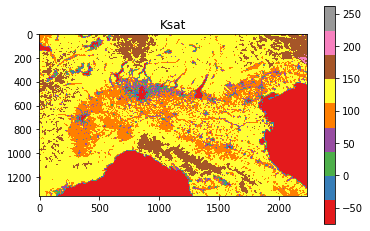

In [ ]:
plt.imshow(Ksat_R_img, cmap='Set1',)
plt.colorbar()
plt.title('Ksat')
plt.show()

In [ ]:
# save Ksat group
ksat_Rosetta = silt60100.meta
ksat_Rosetta.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('ksat_Rosetta_60_100.tif', 'w', **ksat_Rosetta) as dst:
        dst.write_band(1, Ksat_R_img.astype(rasterio.float32))

# 100 - 200 cm Ksat group estimation (Rawls and Brakensiek, 1983)

In [ ]:
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_100-200cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_100-200_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
clay100200 = rasterio.open(".northIT_clay_100-200_mean.tif", driver="GTiff")

In [ ]:
response = sand_wcs.getCoverage(
    identifier='sand_100-200cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_100-200_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand100200 = rasterio.open(".northIT_sand_100-200_mean.tif", driver="GTiff")

In [ ]:
response = bdod_wcs.getCoverage(
    identifier='bdod_100-200cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_100-200_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
bdod100200 = rasterio.open(".northIT_bdod_100-200_mean.tif", driver="GTiff")

In [ ]:
response = silt_wcs.getCoverage(
    identifier='silt_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
import rasterio
silt100200 = rasterio.open(".northIT_silt_60-100_mean.tif", driver="GTiff")

In [ ]:
#transform the input data ind datagrame and det them in the tables unit of measure
x = sand100200.read(1)/1000
y = clay100200.read(1)/1000
z = bdod100200.read(1)/100

In [ ]:
# import the pandas library for the dataframe managing
import pandas as pd
# import form the shaply library the fuction point and Polygon to trasform the 
# input raster gfeoreferenced data into a table point object and to transform 
# the loaded Table's polygon point in to a Polygon object
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

#first chek of input data, if the poin are out of the polygon data raise an error
#if ((sand100200.read(1)+silt100200.read(1))> 1000).any():
#    raise Exception ('sand and clay % excede the 100%. check the input data!')

# load data from the .xlsx file and transform them in Polygons 
hbd=pd.read_excel('Ksat.xlsx',sheet_name='high bulk density poli') #high bulk density
hbd_1 = pd.DataFrame(hbd, columns= ['poligono 1 x','poligono 1 y'])
hbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
hbd_1p=Polygon(hbd_1.values.tolist())
hbd_2 = pd.DataFrame(hbd, columns= ['poligono 2 x','poligono 2 y'])
hbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
hbd_2p=Polygon(hbd_2.values.tolist())
hbd_3 = pd.DataFrame(hbd, columns= ['poligono 3 x','poligono 3 y'])
hbd_3p=Polygon(hbd_3.values.tolist())
hbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
hbd_4 = pd.DataFrame(hbd, columns= ['poligono 4 x','poligono 4 y'])
hbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
hbd_4p=Polygon(hbd_4.values.tolist())
hbd_5 = pd.DataFrame(hbd, columns= ['poligono 5 x','poligono 5 y'])
hbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
hbd_5p=Polygon(hbd_5.values.tolist())

In [ ]:
mbd=pd.read_excel('Ksat.xlsx',sheet_name='med bulk density poli') #med bulk density
mbd_1 = pd.DataFrame(mbd, columns= ['poligono 1 x','poligono 1 y'])
mbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
mbd_1p=Polygon(mbd_1.values.tolist())
mbd_2 = pd.DataFrame(mbd, columns= ['poligono 2 x','poligono 2 y'])
mbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
mbd_2p=Polygon(mbd_2.values.tolist())
mbd_3 = pd.DataFrame(mbd, columns= ['poligono 3 x','poligono 3 y'])
mbd_3p=Polygon(mbd_3.values.tolist())
mbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
mbd_4 = pd.DataFrame(mbd, columns= ['poligono 4 x','poligono 4 y'])
mbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
mbd_4p=Polygon(mbd_4.values.tolist())
mbd_5 = pd.DataFrame(mbd, columns= ['poligono 5 x','poligono 5 y'])
mbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
mbd_5p=Polygon(mbd_5.values.tolist())
mbd_6 = pd.DataFrame(mbd, columns= ['poligono 6 x','poligono 6 y'])
mbd_6.dropna(subset = ["poligono 6 x"], inplace=True)
mbd_6p=Polygon(mbd_6.values.tolist())

In [ ]:
lbd=pd.read_excel('Ksat.xlsx',sheet_name='low bulk density poli') #led bulk density
lbd_1 = pd.DataFrame(lbd, columns= ['poligono 1 x','poligono 1 y'])
lbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
lbd_1p=Polygon(lbd_1.values.tolist())
lbd_2 = pd.DataFrame(lbd, columns= ['poligono 2 x','poligono 2 y'])
lbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
lbd_2p=Polygon(lbd_2.values.tolist())
lbd_3 = pd.DataFrame(lbd, columns= ['poligono 3 x','poligono 3 y'])
lbd_3p=Polygon(lbd_3.values.tolist())
lbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
lbd_4 = pd.DataFrame(lbd, columns= ['poligono 4 x','poligono 4 y'])
lbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
lbd_4p=Polygon(lbd_4.values.tolist())
lbd_5 = pd.DataFrame(lbd, columns= ['poligono 5 x','poligono 5 y'])
lbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
lbd_5p=Polygon(lbd_5.values.tolist())
lbd_6 = pd.DataFrame(lbd, columns= ['poligono 6 x','poligono 6 y'])
lbd_6.dropna(subset = ["poligono 6 x"], inplace=True)
lbd_6p=Polygon(lbd_6.values.tolist())
lbd_7 = pd.DataFrame(lbd, columns= ['poligono 7 x','poligono 7 y'])
lbd_7.dropna(subset = ["poligono 7 x"], inplace=True)
lbd_7p=Polygon(lbd_7.values.tolist())

In [ ]:
# import numpy because it will be needed in the definde fucntion
import numpy as np
# define a function for the bulk density class selection
def bd_group_selector(x,y,z,lbd_6p,lbd_5p,lbd_4p,lbd_3p,lbd_2p,lbd_1p,lbd_7p,mbd_6p,mbd_5p,mbd_4p,mbd_3p,mbd_2p,mbd_1p,hbd_5p,hbd_4p,hbd_3p,hbd_2p,hbd_1p):
  bd_group = np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
     point = Point(x[i,j],y[i,j])
     if x[i,j] == 0 and y[i,j] == 0: #mare o  no data
       bd_group[i,j] = -1
     elif lbd_7p.contains(point) and z[i,j]<1.19:
       bd_group[i,j] = 1
     elif lbd_6p.contains(point) and z[i,j]<0.93:
       bd_group[i,j] = 1
     elif lbd_5p.contains(point) and z[i,j]<1.32:
       bd_group[i,j] = 1
     elif lbd_4p.contains(point) and z[i,j]<1.06:
       bd_group[i,j] = 1
     elif lbd_3p.contains(point) and z[i,j]<1.32:
       bd_group[i,j] = 1
     elif lbd_2p.contains(point) and z[i,j]<1.06:
       bd_group[i,j] = 1
     elif lbd_1p.contains(point) and z[i,j]<0.93:  
       bd_group[i,j] = 1 
     elif hbd_5p.contains(point) and 1.72<z[i,j]:
       bd_group[i,j] = 3      
     elif hbd_4p.contains(point) and 1.19<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_3p.contains(point) and 1.46<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_2p.contains(point) and 1.59<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_1p.contains(point) and 1.32<z[i,j]:
       bd_group[i,j] = 3
     elif mbd_6p.contains(point) and 1.59<=z[i,j]<=1.72:
       bd_group[i,j] = 2
     elif mbd_5p.contains(point) and 1.48<=z[i,j]<=1.72:
       bd_group[i,j] = 2
     elif mbd_4p.contains(point) and 0.93<=z[i,j]<=1.19:
       bd_group[i,j] = 2
     elif mbd_3p.contains(point) and 1.19<=z[i,j]<=1.46:
       bd_group[i,j] = 2
     elif mbd_2p.contains(point) and 1.30<=z[i,j]<=1.48:
       bd_group[i,j] = 2
     else:
       bd_group[i,j] = 0
  return bd_group


Text(0, 0.5, 'Row #')

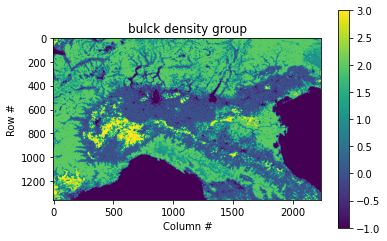

In [ ]:
bd_group = bd_group_selector(x,y,z,lbd_6p,lbd_5p,lbd_4p,lbd_3p,lbd_2p,lbd_1p,lbd_7p,mbd_6p,mbd_5p,mbd_4p,mbd_3p,mbd_2p,mbd_1p,hbd_5p,hbd_4p,hbd_3p,hbd_2p,hbd_1p)

import matplotlib.pyplot as plt

plt.imshow(bd_group)
plt.colorbar()
plt.title('bulck density group')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
# Ksat Goup table loading 
Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI High bulk') #med bulk density
hb_l_ksat= pd.DataFrame(Ksat, columns= ['low x','low y'])
hb_l_ksat.dropna(subset = ["low x"], inplace=True)
hb_l_ksatp=Polygon(hb_l_ksat.values.tolist())
hb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
hb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
hb_ml_ksatp = Polygon(hb_ml_ksat.values.tolist())
hb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
hb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
hb_mh_ksatp=Polygon(hb_mh_ksat.values.tolist())

Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI Med bulk') #med bulk density
mb_l_ksat= pd.DataFrame(Ksat, columns= ['low x','low y'])
mb_l_ksat.dropna(subset = ["low x"], inplace=True)
mb_l_ksatp=Polygon(mb_l_ksat.values.tolist())
mb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
mb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
mb_ml_ksatp = Polygon(mb_ml_ksat.values.tolist())
mb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
mb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
mb_mh_ksatp=Polygon(mb_mh_ksat.values.tolist())
mb_h_ksat = pd.DataFrame(Ksat, columns= ['high x','high y'])
mb_h_ksat.dropna(subset = ['high x'], inplace=True)
mb_h_ksatp=Polygon(mb_h_ksat.values.tolist())


Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI Low bulk') #med bulk density
lb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
lb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
lb_ml_ksatp = Polygon(lb_ml_ksat.values.tolist())
lb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
lb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
lb_mh_ksatp=Polygon(lb_mh_ksat.values.tolist())
lb_h_ksat = pd.DataFrame(Ksat, columns= ['high x','high y'])
lb_h_ksat.dropna(subset = ['high x'], inplace=True)
lb_h_ksatp=Polygon(lb_h_ksat.values.tolist())


#Ksat Group assignement

GKsat = np.zeros(np.shape(x))
GKsatm = (1)
for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
        point = Point(x[i,j],y[i,j])
        if bd_group[i,j] == -1: #mare lago o no data
            GKsat[i,j] = -1
        elif bd_group [i,j] == 1:
            if lb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif lb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
            elif lb_h_ksatp.contains(point):
                GKsat[i,j] = 4
        elif bd_group [i,j] == 2:
            if mb_l_ksatp.contains(point):
                GKsat[i,j] = 1
            elif mb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif mb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
            elif mb_h_ksatp.contains(point):
                GKsat[i,j] = 4
        elif bd_group [i,j] == 3:
            if hb_l_ksatp.contains(point):
                GKsat[i,j] = 1
            elif hb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif hb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
        elif bd_group [i,j] == 0:
            GKsat[i,j] = GKsatm
        Gksatm = GKsat[i,j] # dato precedente: se il dato non è presente viene assegnato il gruppo della cella accanto



Text(0.5, 1.0, 'Ksat group')

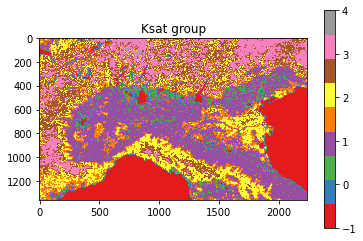

In [ ]:
# result plotting 
plt.imshow(GKsat, cmap='Set1',)
plt.colorbar()
plt.title('Ksat group')

In [ ]:
# save Ksat group
Group_ksat = silt100200.meta
Group_ksat.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('Group_ksat100-200.tif', 'w', **Group_ksat) as dst:
        dst.write_band(1, GKsat.astype(rasterio.float32))

# 100 - 200 cm Ksat group estimation (Rosetta)

In [ ]:
sand_c100200 = sand100200.read(1).flatten()/1000
silt_c100200 = silt100200.read(1).flatten()/1000
clay_c100200 = clay100200.read(1).flatten()/1000
bd_c100200 = bdod100200.read(1).flatten()/100
split_sand_c100200 = np.split(sand_c100200,100)
split_silt_c100200 = np.split(silt_c100200,100)
split_clay_c100200 = np.split(clay_c100200,100)
split_bd_c100200 = np.split(bd_c100200,100)

dim=(np.shape(sand_c100200)[0])
Ksat = np.zeros(dim)
start = 0
for i in range(100):
  input_data = np.column_stack((split_sand_c100200[i],split_silt_c100200[i],split_clay_c[i],split_bd_c100200[i]))
  np.savetxt('input_data.txt', input_data)
  #create an empity output file
  output_data  = np.array([0,0])
  np.savetxt('output_data.txt', output_data)
  %run /content/drive/MyDrive/Rosetta_3/Rpredict.py   -i   input_data.txt  -o  output_data.txt --predict  --sqlite=/content/drive/MyDrive/Rosetta_3/sqlite/Rosetta.sqlite
  output = np.loadtxt('output_data.txt', delimiter=',')
  finish = start+int(dim/100) 
  Ksat [start:finish] = output[:,4]
  start = finish
  print(i)

input_data.txt
[[0.462      0.481      0.501      ... 0.449      0.451      0.491     ]
 [0.288      0.291      0.292      ... 0.358      0.354      0.344     ]
 [0.23983333 0.21483333 0.19883333 ... 0.21349999 0.21508333 0.192     ]
 [1.61       1.6        1.61       ... 1.43       1.46       1.45      ]]
Getting models from database
Getting models from database, done (0.10617542266845703 s)
[[0.462      0.481      0.501      ... 0.449      0.451      0.491     ]
 [0.288      0.291      0.292      ... 0.358      0.354      0.344     ]
 [0.23983333 0.21483333 0.19883333 ... 0.21349999 0.21508333 0.192     ]
 [1.61       1.6        1.61       ... 1.43       1.46       1.45      ]]
Processing
Processing done (61.225245237350464 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.68400131e-01 4.54483688e-01 1.24623784e-02 2.35964054e+00
  1.01970767e+02]
 [1.68501790e-01 4.55646731e-01 1.24527928e-02 2.36163643e+00
  1.03694564e+02]
 [1.68350738e-01 4.54452627e-01 1.24676353e-02 2.3

<Figure size 432x288 with 0 Axes>

In [ ]:
np.savetxt('Ksat.txt', Ksat)

In [ ]:
Ksat_Rosetta = np.loadtxt('Ksat.txt', dtype= float)
Ksat_R_img = np.reshape(Ksat_Rosetta,[1360,2240])
Ksat_R_img = Ksat_R_img*(GKsat>0)+(GKsat<=0)*-75

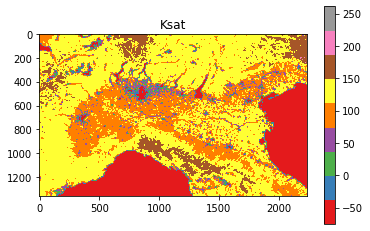

In [ ]:
plt.imshow(Ksat_R_img, cmap='Set1',)
plt.colorbar()
plt.title('Ksat')
plt.show()

In [ ]:
# save Ksat group
ksat_Rosetta = silt100200.meta
ksat_Rosetta.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('ksat_Rosetta_100_200.tif', 'w', **ksat_Rosetta) as dst:
        dst.write_band(1, Ksat_R_img.astype(rasterio.float32))

#Min Ksat layer evaluation

In the following section is realized a map with a value equal to 1 in all the pixel where the estimate Ksat value (or group) has the minimum value between 60 and 100 cm.

In [ ]:
Group_ksat100_200 = rasterio.open("Group_ksat100-200.tif", driver="GTiff")
Group_ksat60_100 = rasterio.open("Group_ksat60-100.tif", driver="GTiff")
Group_ksat0_60 = rasterio.open("Group_ksat0-60.tif", driver="GTiff")

min_GI = (Group_ksat60_100.read(1)<Group_ksat0_60.read(1))*(Group_ksat60_100.read(1)<Group_ksat100_200.read(1))

In [ ]:
# result plotting 
plt.imshow(min_GI, cmap='Set1',)
plt.colorbar()
plt.title('Area where the minimum Ksat is between 60 and 100 cm')

In [ ]:
# save Ksat group
min60_100 = silt060.meta
min60_100.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('Min60_100_B.tif', 'w', **min60_100) as dst:
        dst.write_band(1, min_GI.astype(rasterio.float32))

In [ ]:
Group_ksat100_200 = rasterio.open("ksat_Rosetta_100_200.tif", driver="GTiff")
Group_ksat60_100 = rasterio.open("ksat_Rosetta_60_100.tif", driver="GTiff")
Group_ksat0_60 = rasterio.open("ksat_Rosetta_0_60.tif", driver="GTiff")

min_GI = (Group_ksat60_100.read(1)<Group_ksat0_60.read(1))*(Group_ksat60_100.read(1)<Group_ksat100_200.read(1))

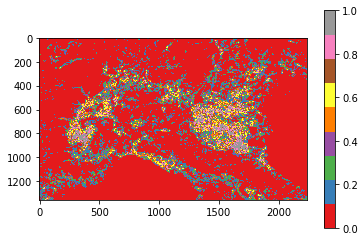

In [ ]:
# result plotting 
plt.imshow(min_GI, cmap='Set1',)
plt.colorbar()

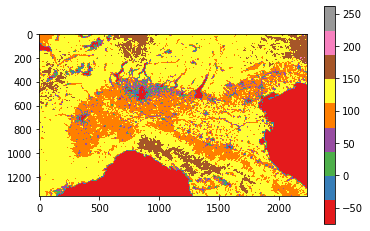

In [ ]:
# result plotting 
plt.imshow(Group_ksat100_200.read(1), cmap='Set1',)
plt.colorbar()

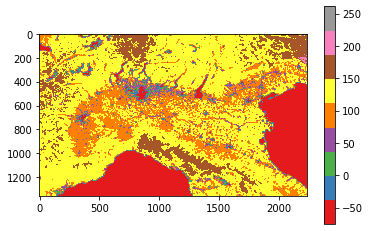

In [ ]:
# result plotting 
plt.imshow(Group_ksat60_100.read(1), cmap='Set1',)
plt.colorbar()

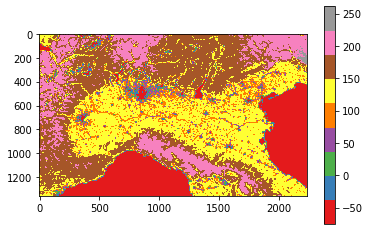

In [ ]:
# result plotting 
plt.imshow(Group_ksat0_60.read(1), cmap='Set1',)
plt.colorbar()

In [ ]:
# save Ksat group
min60_100 = silt060.meta
min60_100.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('Min60_100_R.tif', 'w', **min60_100) as dst:
        dst.write_band(1, min_GI.astype(rasterio.float32))